# Feature Engineering & Data Cleaning
## Outliers

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Generate test data

In [106]:
# Choose a mean,standard deviation, and number of samples

def create_ages(mu=50,sigma=13,num_samples=100,seed=42):

    # Set a random seed in the same cell as the random call to get the same values as us
    # We set seed to 42 (42 is an arbitrary choice from Hitchhiker's Guide to the Galaxy)
    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)

    return sample_ages

In [107]:
sample = pd.Series(create_ages(), name="age")

### Visual Analysis
Box plot shows a outlier in the dataset.

<Axes: ylabel='age'>

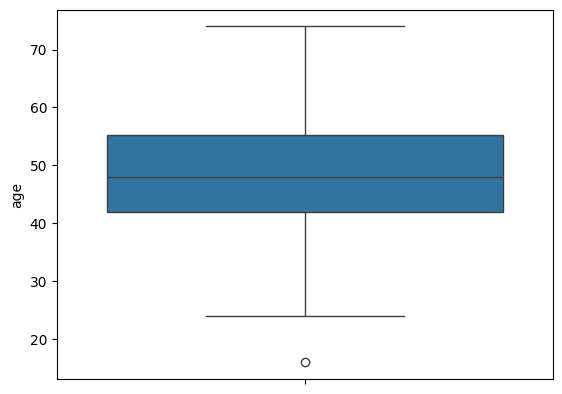

In [108]:
sns.boxplot(sample)

### Filter Outlier

In [109]:
q25, q75 = np.percentile(sample, (25,75))
IQR = q75 - q25
lower_limit_age = q25 - IQR * 1.5

In [110]:
sample

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Name: age, Length: 100, dtype: float64

In [111]:
filter_sample = sample[sample > lower_limit_age]
len(sample), len(filter_sample)

(100, 99)

### Clean dataset

In [112]:
df = pd.read_csv("../ml/DATA/Ames_Housing_Data.csv")

In [113]:
df.corr()["SalePrice"].sort_values(ascending=False)

/tmp/ipykernel_207431/2813194234.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["SalePrice"].sort_values(ascending=False)


SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

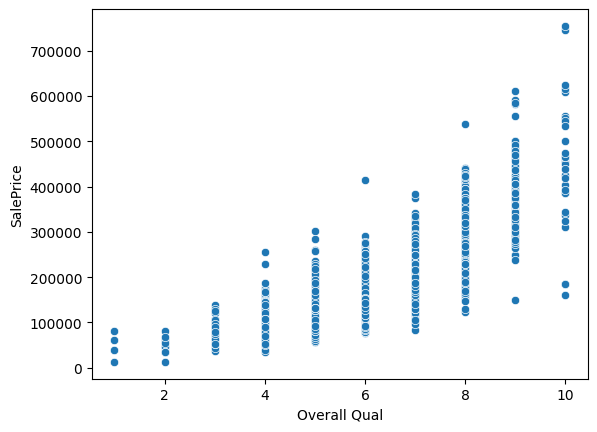

In [114]:
sns.scatterplot(data=df,x="Overall Qual",y="SalePrice")

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

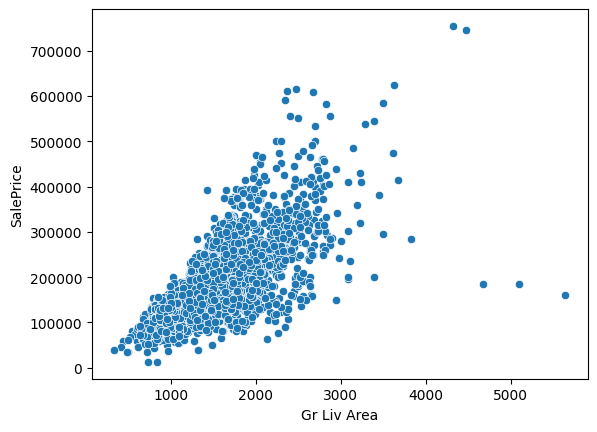

In [115]:
sns.scatterplot(data=df,x="Gr Liv Area",y="SalePrice")

In [116]:
df[(df["Overall Qual"] > 8) & (df["SalePrice"] < 200_000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [117]:
df[(df["Gr Liv Area"] > 4000) & (df["SalePrice"] < 400_000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


### Drop Outlier

In [118]:
outlier_index = df[(df["Gr Liv Area"] > 4000) & (df["SalePrice"] < 400_000)].index
df = df.drop(outlier_index,axis=0)

## Missing Data

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [120]:
df = df.drop("PID",axis=1)

In [121]:
len(df.columns)

80

### Missing values

In [122]:
df.isnull().sum().sort_values(ascending=False)[:15]

Pool QC           2915
Misc Feature      2822
Alley             2729
Fence             2355
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
dtype: int64

In [123]:
def percent_missing(df):
    percent_nan = df.isnull().sum() * 100 / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values(ascending=False)

    return percent_nan

In [124]:
percent_nan = percent_missing(df)
percent_nan

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Cond        5.432183
Garage Qual        5.432183
Garage Finish      5.432183
Garage Yr Blt      5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
Garage Cars        0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
BsmtFin SF 1       0.034165
Electrical         0.034165
dtype: float64

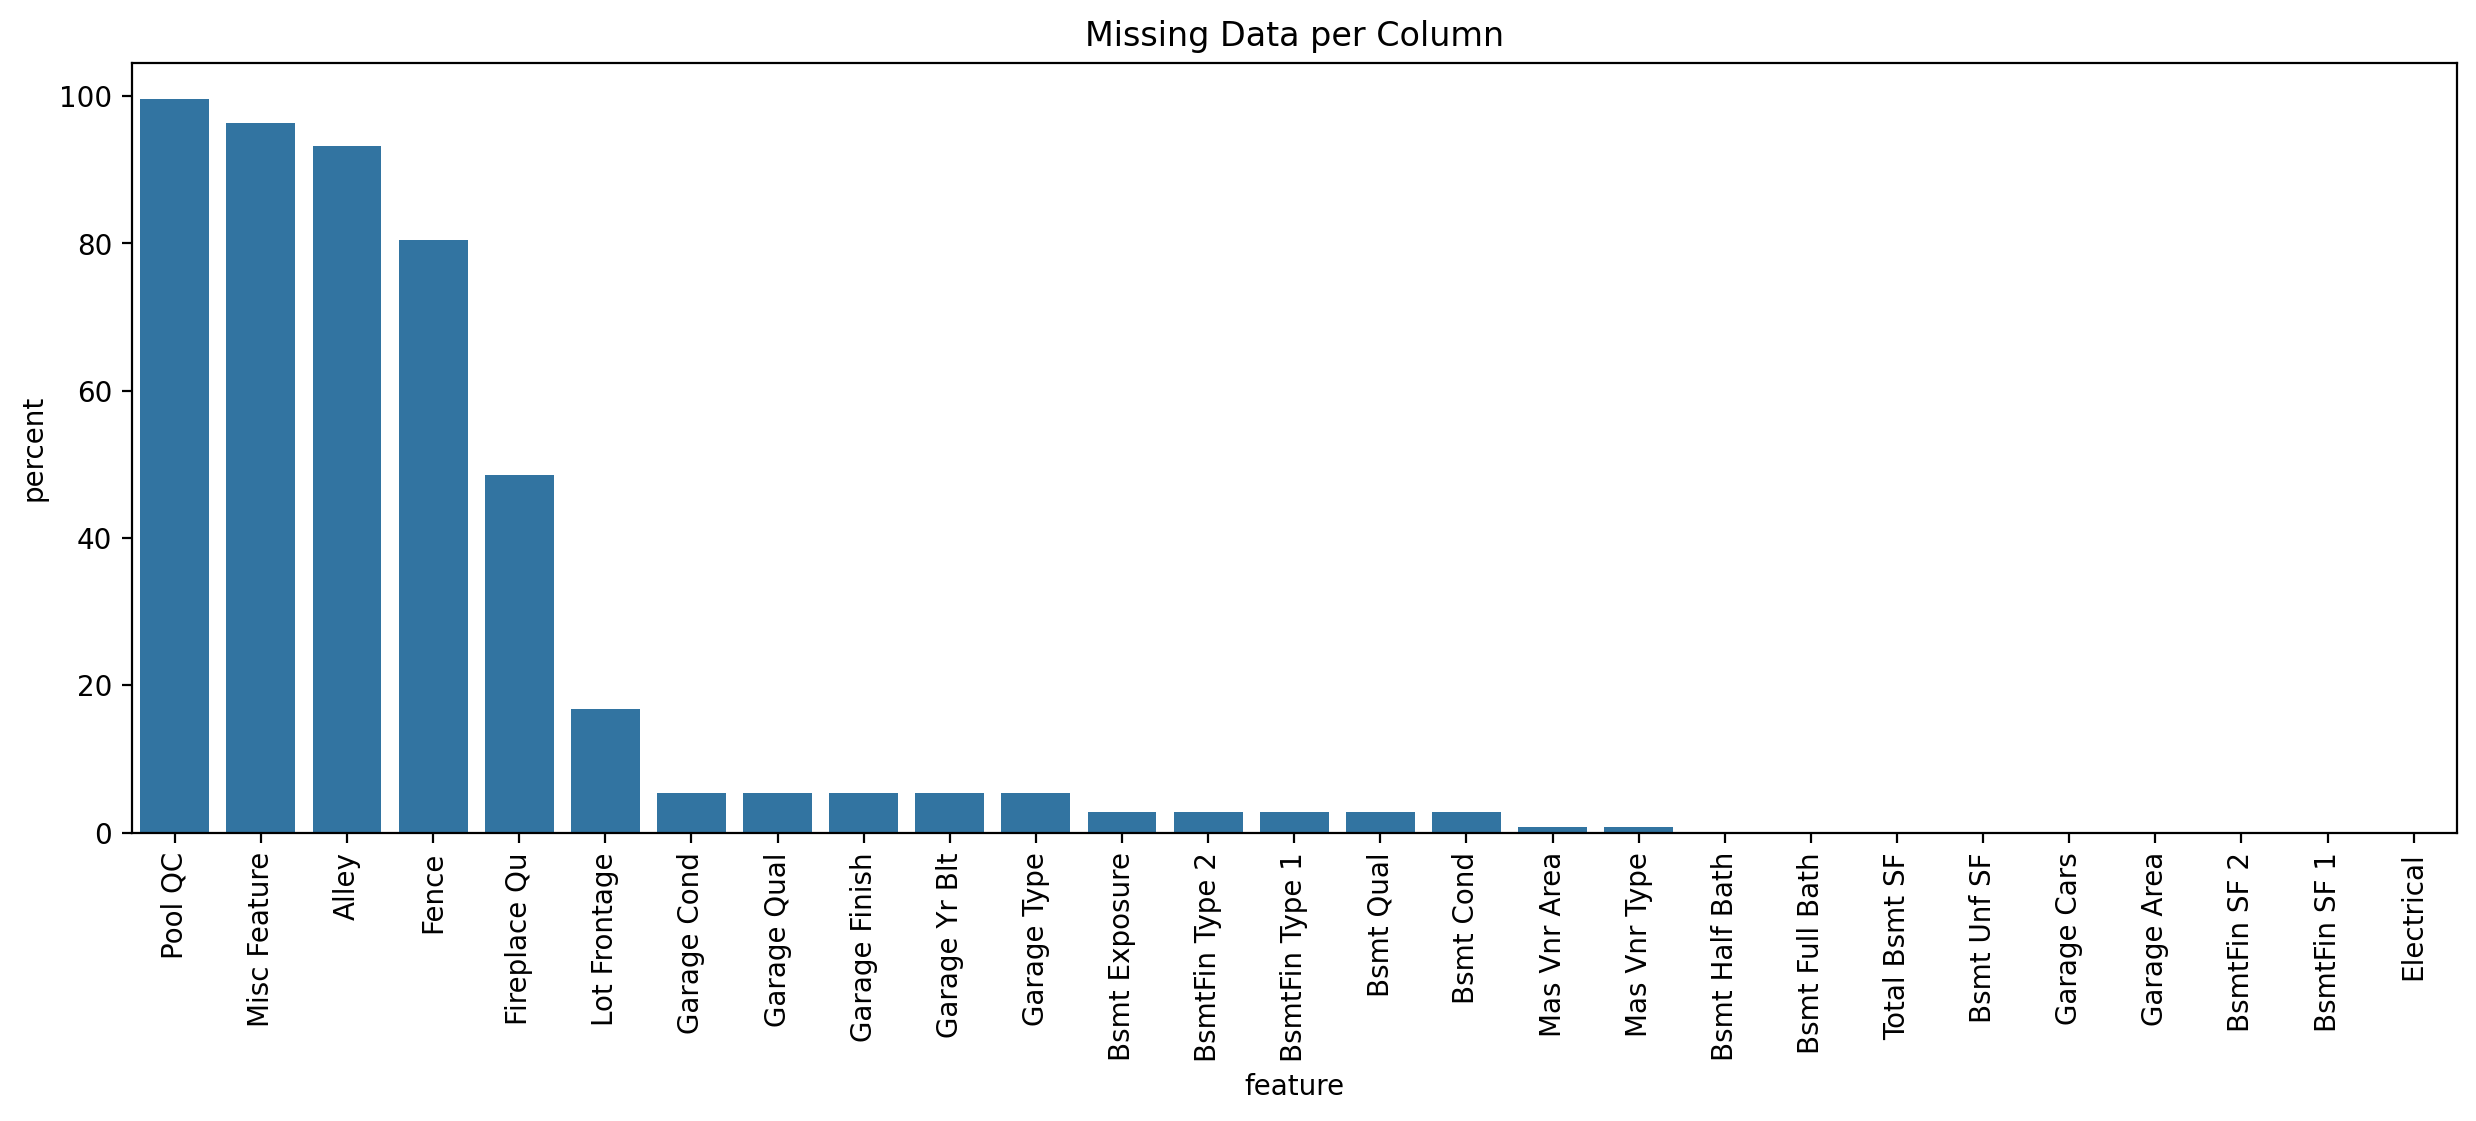

In [125]:
plt.figure(dpi=200,figsize=(15,5))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.title("Missing Data per Column")
plt.xlabel("feature")
plt.ylabel("percent")
plt.xticks(rotation=90)
plt.show()

In [126]:
percent_nan[percent_nan < 1]

Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
Garage Cars       0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
BsmtFin SF 1      0.034165
Electrical        0.034165
dtype: float64

### Droping Rows with NaN

In [127]:
df[(df["Electrical"].isnull()) | (df["Garage Cars"].isnull())]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [128]:
df = df.dropna(axis=0, subset=["Electrical","Garage Cars"])

In [129]:
percent_nan = percent_missing(df)
percent_nan[percent_nan < 1]

Mas Vnr Area      0.786325
Mas Vnr Type      0.786325
Bsmt Half Bath    0.068376
Bsmt Full Bath    0.068376
Bsmt Unf SF       0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Total Bsmt SF     0.034188
dtype: float64

In [130]:
df[df["Bsmt Half Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


### Filling In Missing Column Data
**Filling in data based on column names. There are 2 types of basement features, numerical and string descriptives.**

The numerical basement columns:

In [131]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

The string basement columns:

In [132]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [133]:
percent_nan = percent_missing(df)
percent_nan[percent_nan < 1]

Mas Vnr Type    0.786325
Mas Vnr Area    0.786325
dtype: float64

In [134]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna('None')
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [135]:
percent_nan = percent_missing(df)
percent_nan[percent_nan < 1]

Series([], dtype: float64)

Our previous approaches were based more on rows missing data, now we will take an approach based on the column features themselves, since larger percentages of the data appears to be missing.

In [136]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [137]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [138]:
percent_nan = percent_missing(df)

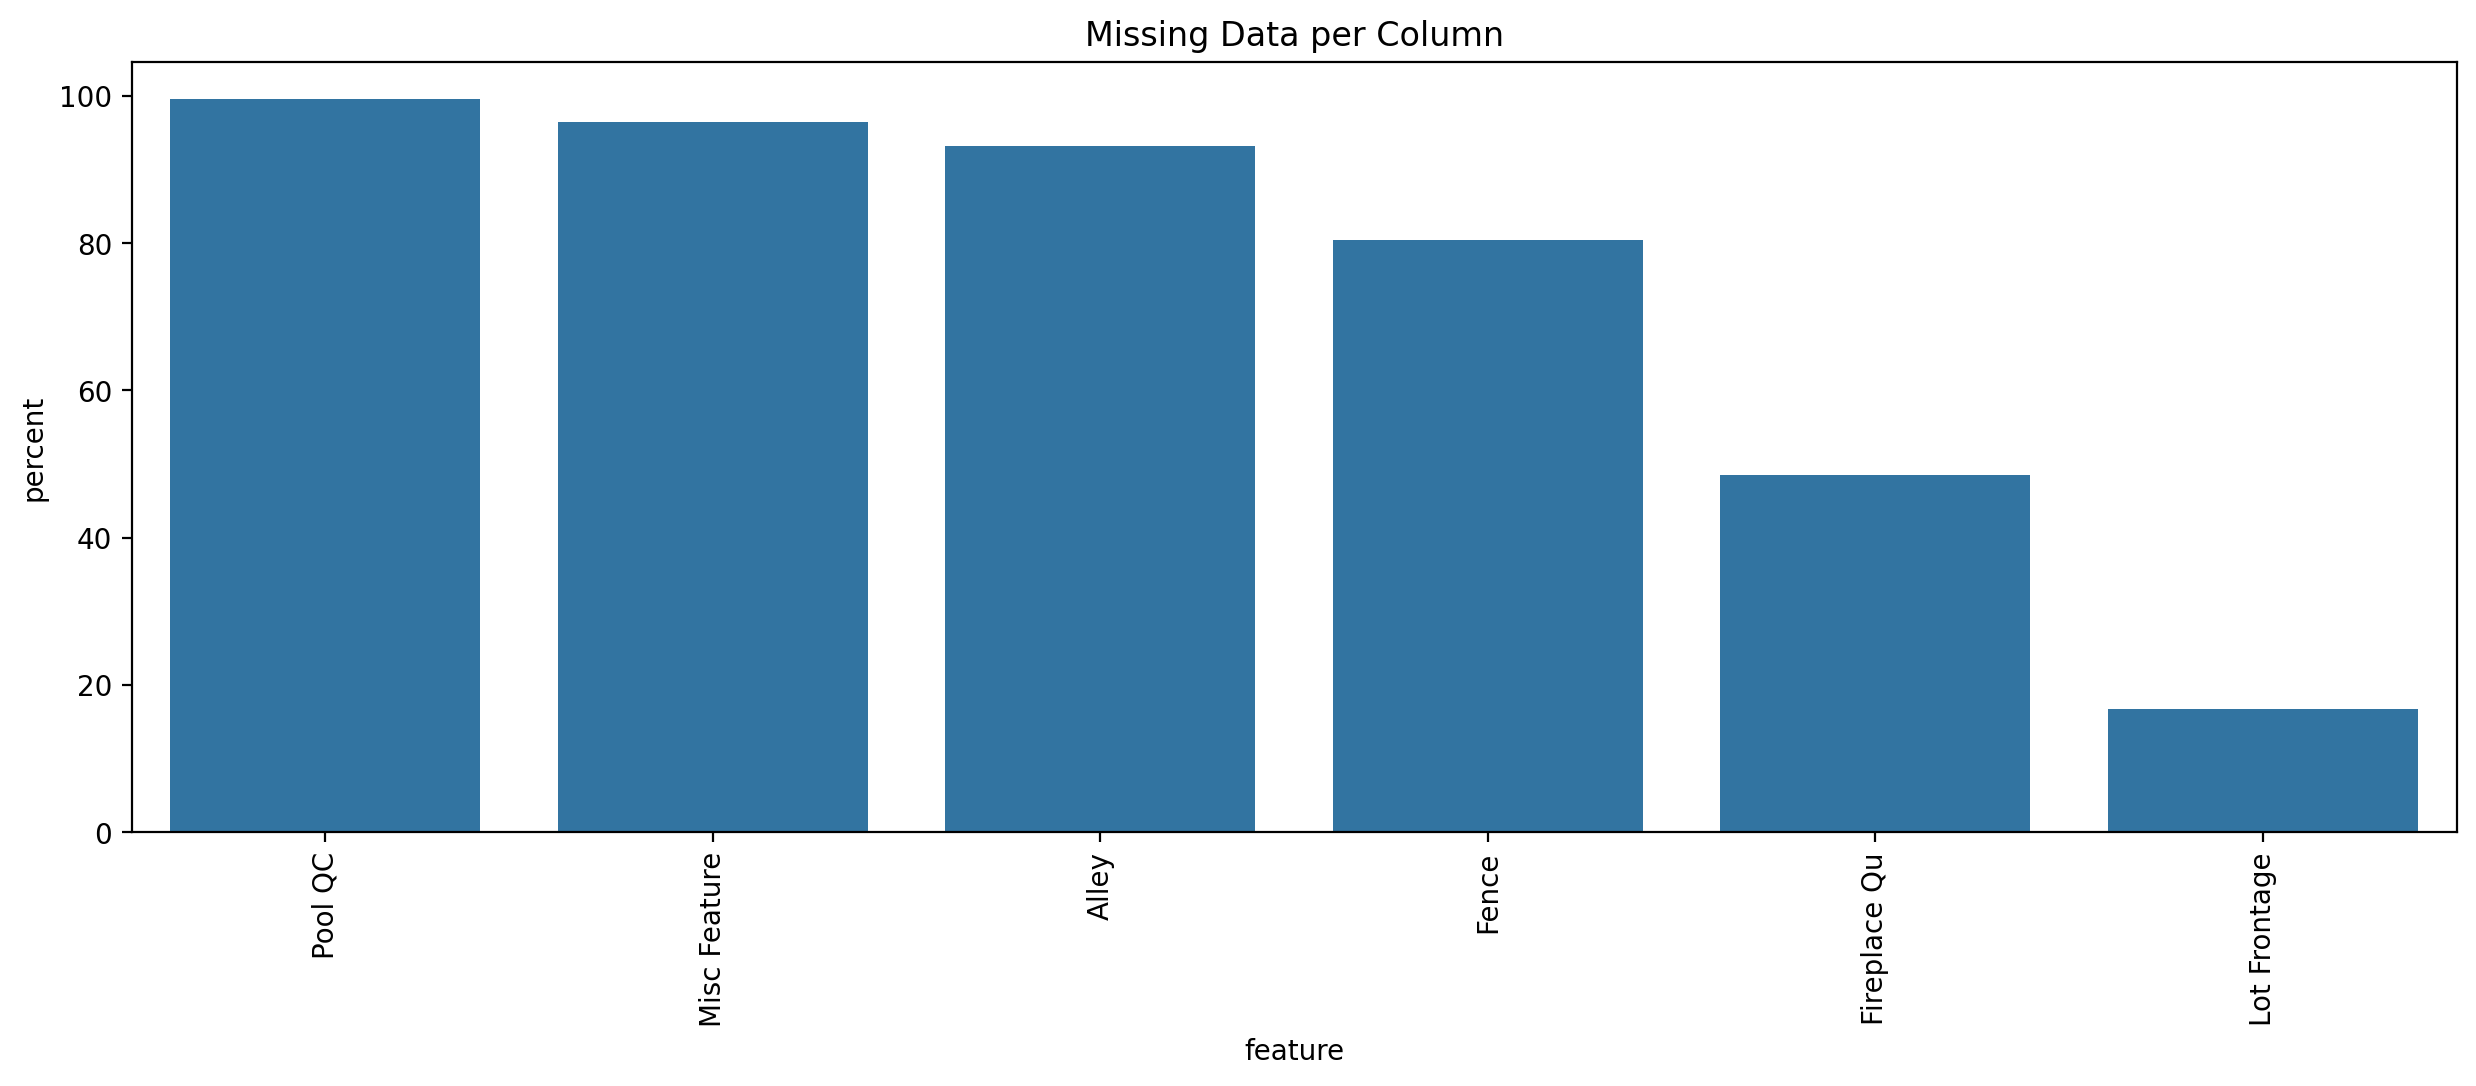

In [139]:
plt.figure(dpi=200,figsize=(15,5))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.title("Missing Data per Column")
plt.xlabel("feature")
plt.ylabel("percent")
plt.xticks(rotation=90)
plt.show()

### Dropping Feature Columns

In [140]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

### Filling in Fireplace Quality based on Description Text

In [141]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

# [Imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)) of Missing Data

To impute missing data, we need to decide what other filled in (no NaN values) feature most probably relates and is correlated with the missing feature data. In this particular case we will use:

Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

In [142]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [145]:
df.isnull().sum().sort_values(ascending=False)

Lot Frontage    3
MS SubClass     0
Half Bath       0
Fireplace Qu    0
Fireplaces      0
               ..
Exter Qual      0
Mas Vnr Area    0
Mas Vnr Type    0
Exterior 2nd    0
SalePrice       0
Length: 76, dtype: int64

In [146]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [147]:
df.isnull().sum().sort_values(ascending=False)

MS SubClass     0
Half Bath       0
Fireplace Qu    0
Fireplaces      0
Functional      0
               ..
Mas Vnr Area    0
Mas Vnr Type    0
Exterior 2nd    0
Exterior 1st    0
SalePrice       0
Length: 76, dtype: int64